In [2]:
import requests
from IPython.display import JSON
import json
from tqdm.auto import tqdm
import time
import asyncio
import aiohttp

In [4]:
ids = range(1, 10000)
results = []

with open("data.jsonl", 'w') as f:
    try:
        for anime_id in tqdm(ids, desc="Fetching anime data"):
            url = f"https://api.jikan.moe/v4/anime/{anime_id}"
            for _ in range(3):
                time.sleep(1.1) 
                response = requests.get(url)
                if response.status_code == 200:
                    data = response.json()
                    if 'data' in data: 
                        results.append(data['data'])
                        f.write(json.dumps(data['data'])+'\n')
                    break
    except KeyboardInterrupt:
        pass

Fetching anime data:   0%|          | 0/9999 [00:00<?, ?it/s]

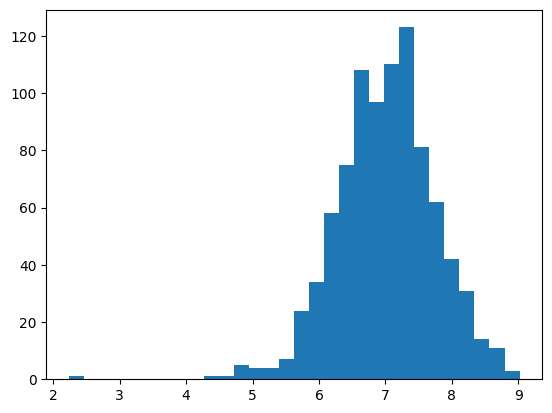

In [8]:
with open("data.json", 'r') as f:
    data = json.load(f)
ratings = [i['score'] for i in data]
from matplotlib import pyplot as plt
plt.hist(ratings, bins=30)
plt.show()

In [6]:
url = f"https://api.jikan.moe/v4/anime/2"
response = requests.get(url)
response

<Response [404]>

In [2]:
import os 
print(len(os.listdir('temp')))

4918
